# Linear response

Here we calculate the linear response of a strongly-driven Duffing resonator as presented in https://doi.org/10.1103/PhysRevX.10.021066.

We use the Jacobian of the harmonic equations as explained here: https://nonlinearoscillations.github.io/HarmonicBalance.jl/stable/examples/linear_response/

In [1]:
using Revise, HarmonicBalance
@variables α, ω, ω0, F, t, η, x(t), γ; # declare constant variables and a function x(t)

In [2]:
# define ODE
diff_eq = DifferentialEquation(d(x,t,2) + ω0*x + α*x^3 + 0*η*d(x,t)*x^2+ γ*d(x,t) ~ F*cos(ω*t), x)

# specify the ansatz x = u(T) cos(ωt) + v(T) sin(ωt)
add_harmonic!(diff_eq, x, ω) 

# implement ansatz to get harmonic equations
harmonic_eq = get_harmonic_equations(diff_eq)

A set of 2 harmonic equations
Variables: u1(T), v1(T)
Parameters: α, ω, γ, ω0, F

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt)

Harmonic equations:

ω0*u1(T) + γ*Differential(T)(u1(T)) + (3//4)*α*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (3//4)*α*(v1(T)^2)*u1(T) - (ω^2)*u1(T) ~ F

ω0*v1(T) + γ*Differential(T)(v1(T)) + (3//4)*α*(v1(T)^3) + (3//4)*α*(u1(T)^2)*v1(T) - (ω^2)*v1(T) - (2//1)*ω*Differential(T)(u1(T)) - γ*ω*u1(T) ~ 0


## weak driving - quasilinear regime


Solving via total degree homotopy ... 100%|██████████████████████████████████████████████████| Time: 0:00:50


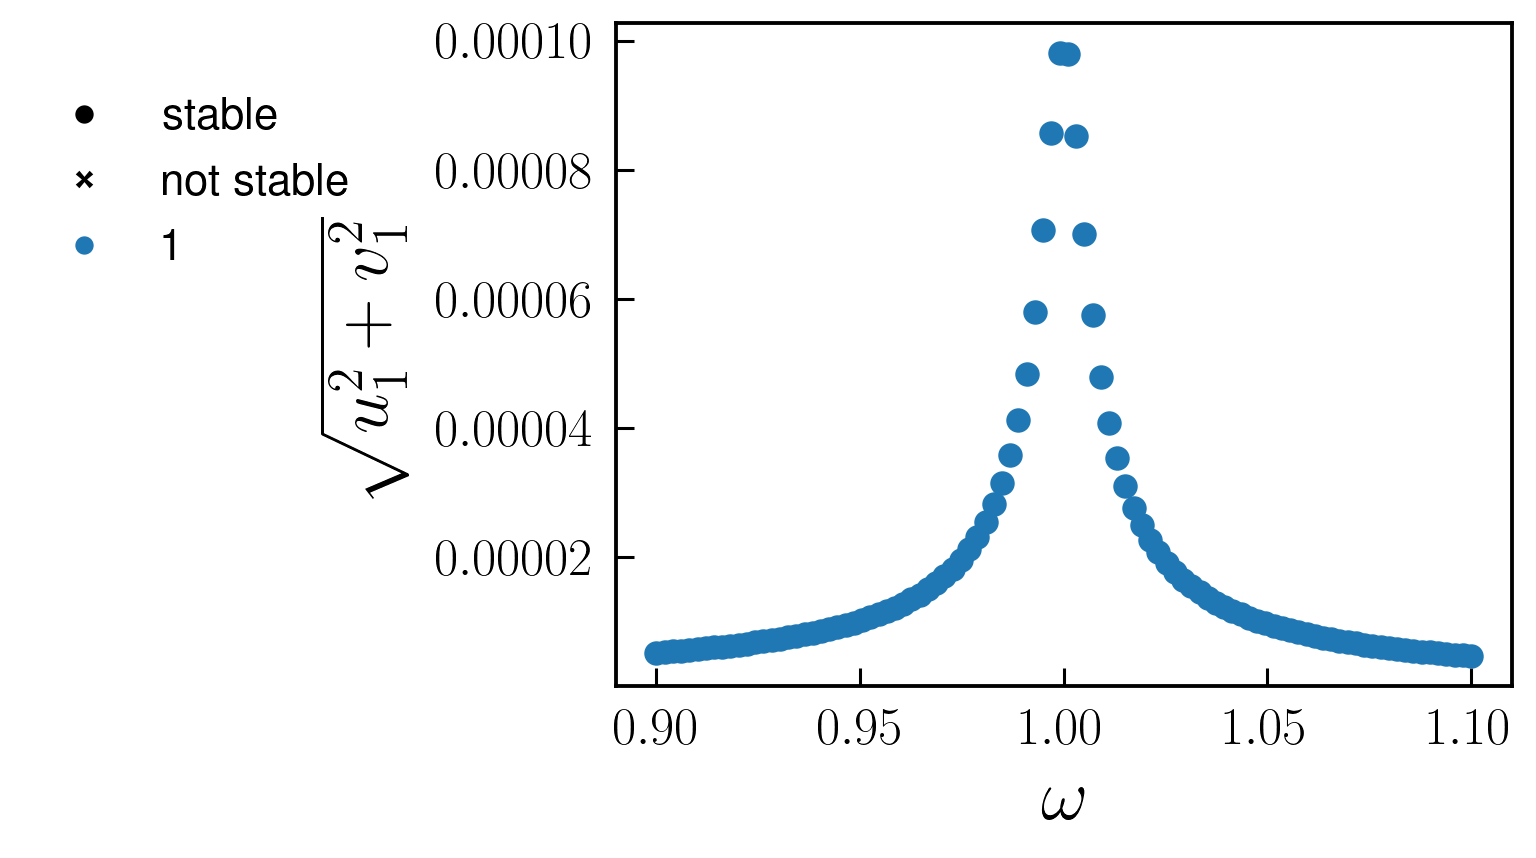

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/hrochan/.julia/packages/PyCall/L0fLP/src/numpy.jl:67
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [3]:
fixed = (α => 1, ω0 => 1.0, γ => 1E-2, F => 1E-6)   # fixed parameters
swept = ω => LinRange(0.9, 1.1, 100)           # range of parameter values
solutions = get_steady_states(harmonic_eq, swept, fixed)

plot(solutions, x="ω", y="sqrt(u1^2 + v1^2)");

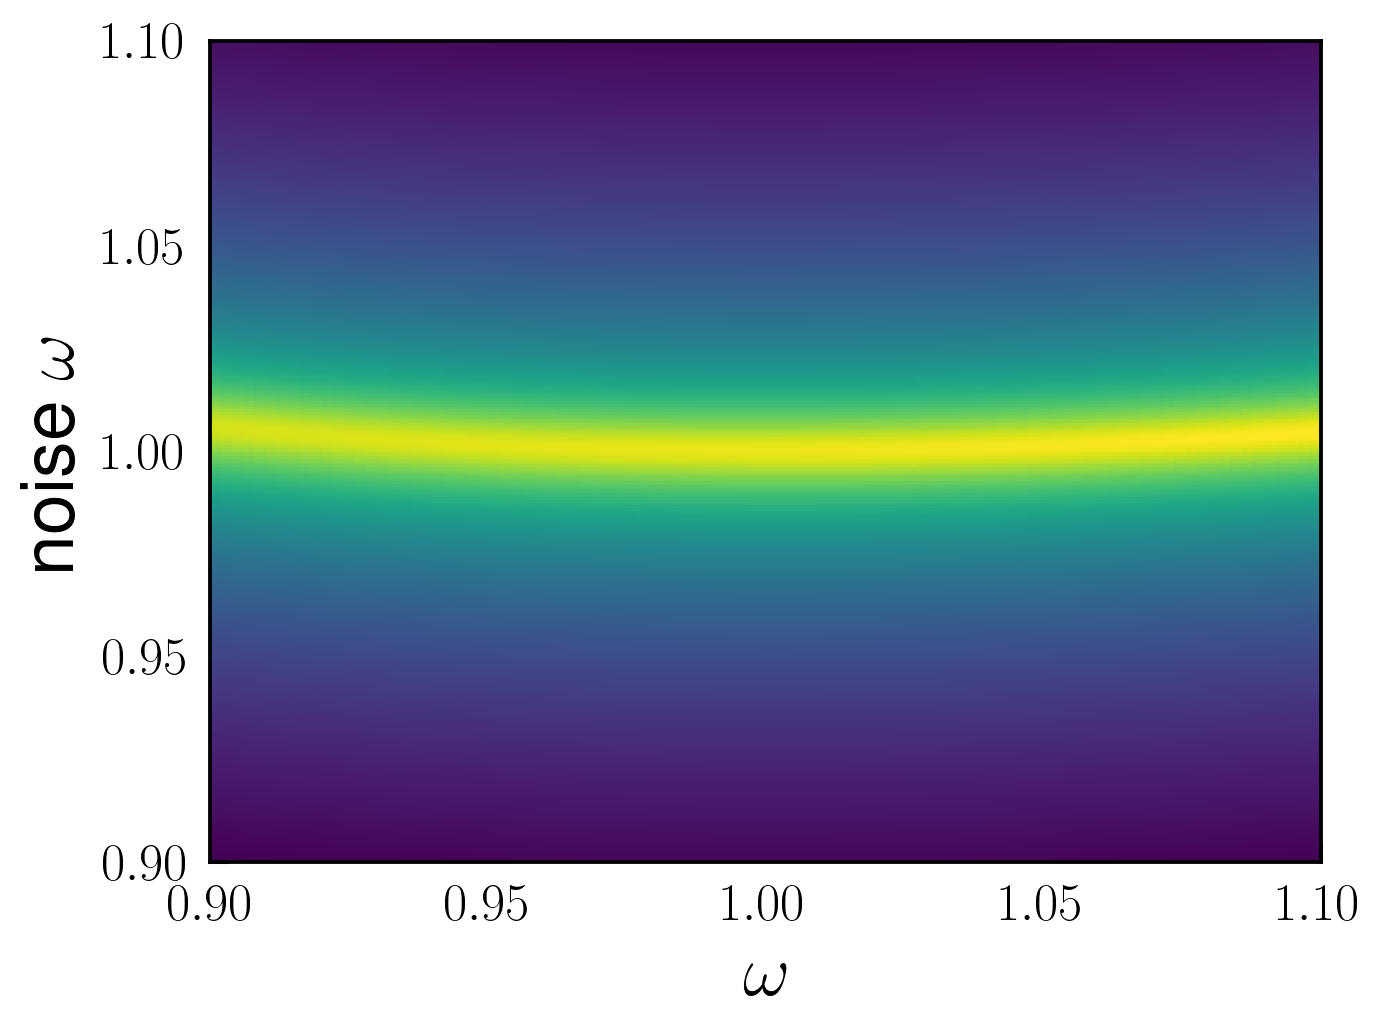

In [55]:
HarmonicBalance.LinearResponse.plot_jacobian_spectrum(solutions, x, 
    Ω_range=LinRange(0.9, 1.1, 300), branch=1, logscale=true);
HarmonicBalance.savefig("Duffing_quasilin_noise.png")

# strong drive - nonlinear regime

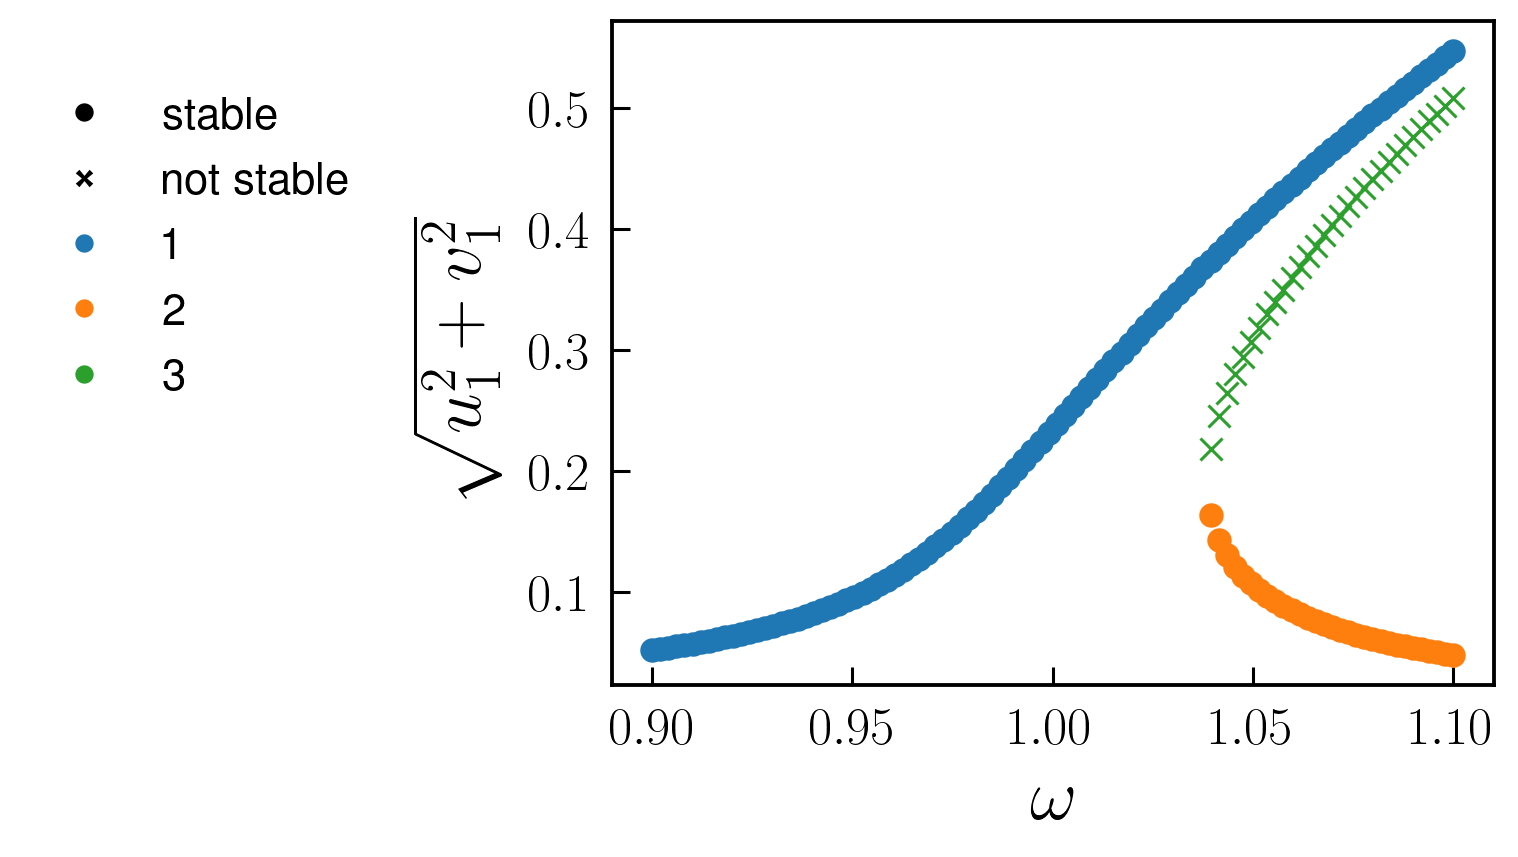

In [4]:
fixed = (α => 1, ω0 => 1.0, γ => 1E-2, F => 1E-2)   # fixed parameters
swept = ω => LinRange(0.9, 1.1, 100)           # range of parameter values
solutions = get_steady_states(harmonic_eq, swept, fixed)

plot(solutions, x="ω", y="sqrt(u1^2 + v1^2)");
HarmonicBalance.savefig("Duffing_nonlin_amp.png")

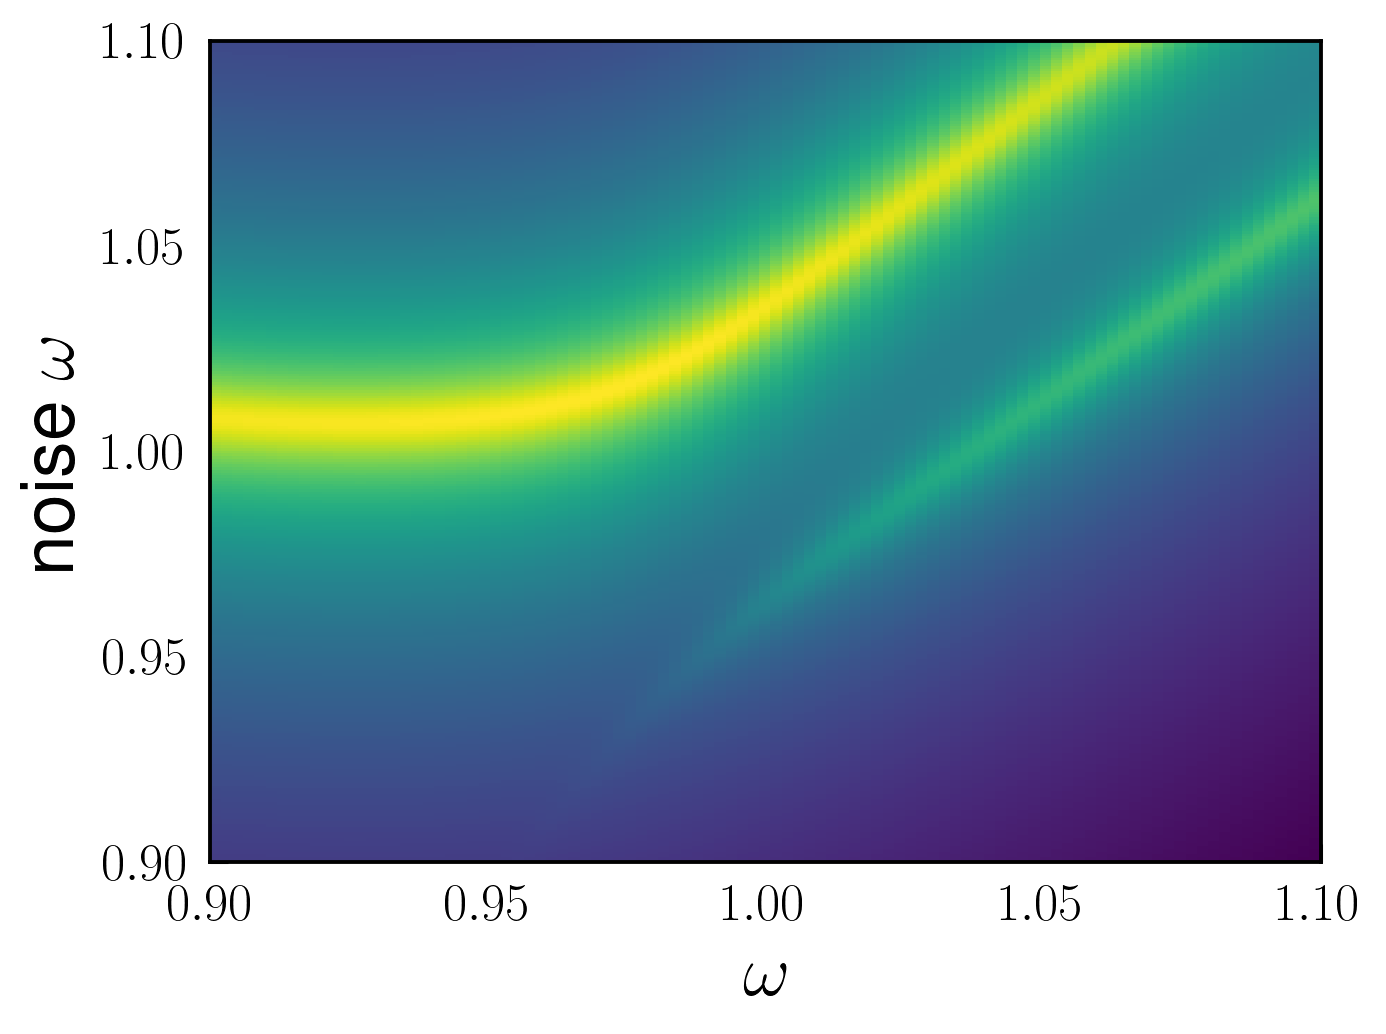

In [62]:
HarmonicBalance.LinearResponse.plot_jacobian_spectrum(solutions, x, 
    Ω_range=LinRange(0.9,1.1,300), branch=1, logscale=true);
HarmonicBalance.savefig("Duffing_nonlin_noise1.png")

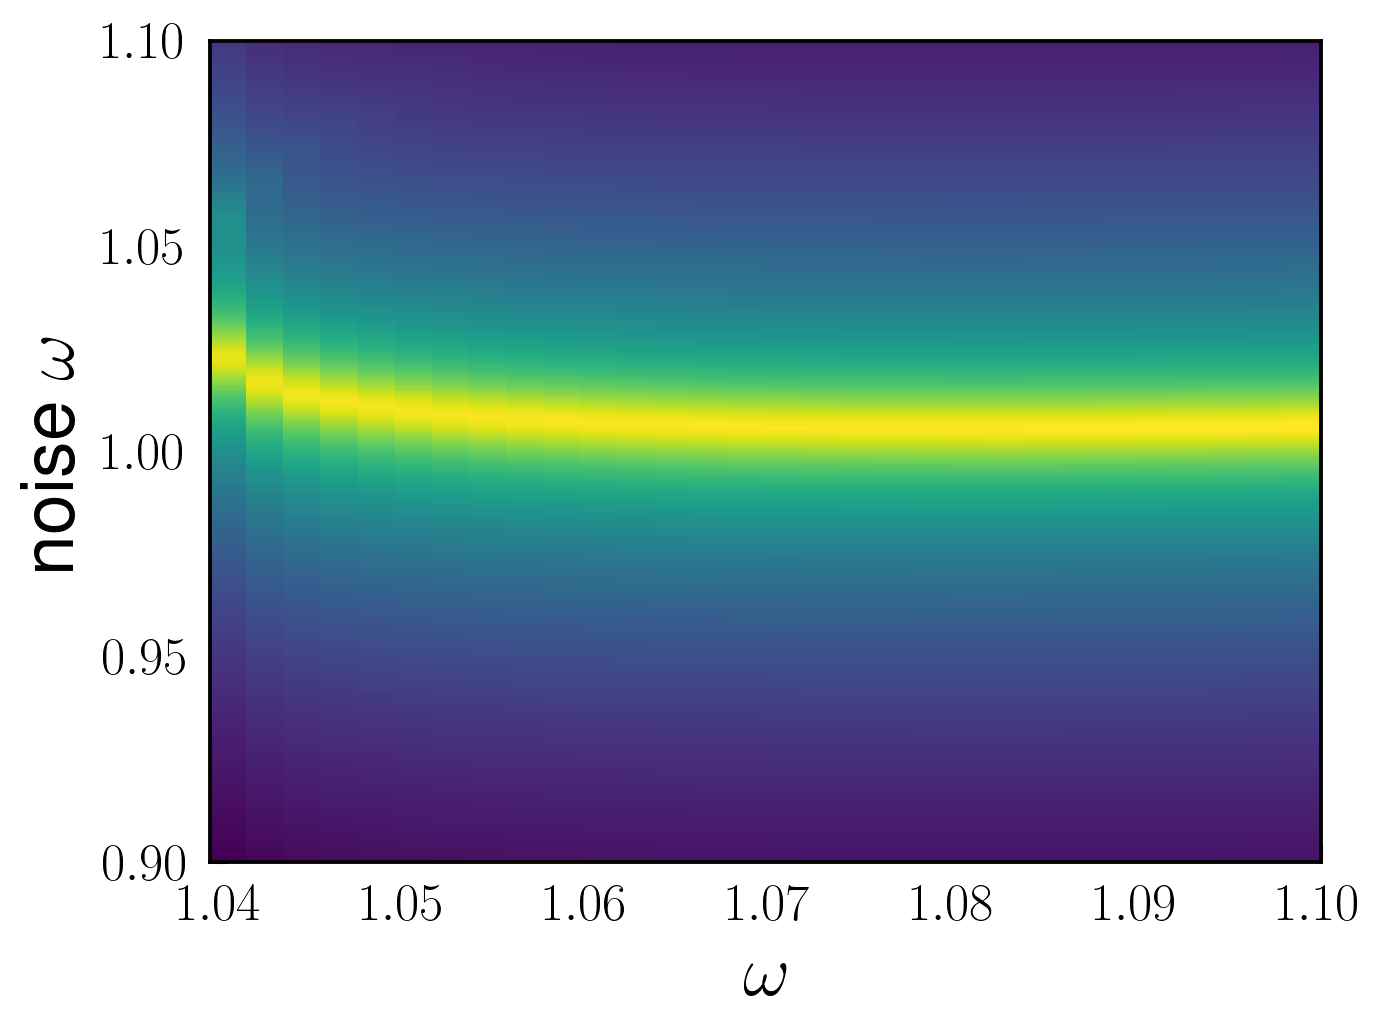

In [63]:
HarmonicBalance.LinearResponse.plot_jacobian_spectrum(solutions, x, 
    Ω_range=LinRange(0.9,1.1,300), branch=2, logscale=true);
HarmonicBalance.savefig("Duffing_nonlin_noise2.png")

## response vs drive amplitude on resonance

Solving via total degree homotopy ... 100%|██████████████████████████████████████████████████| Time: 0:00:01


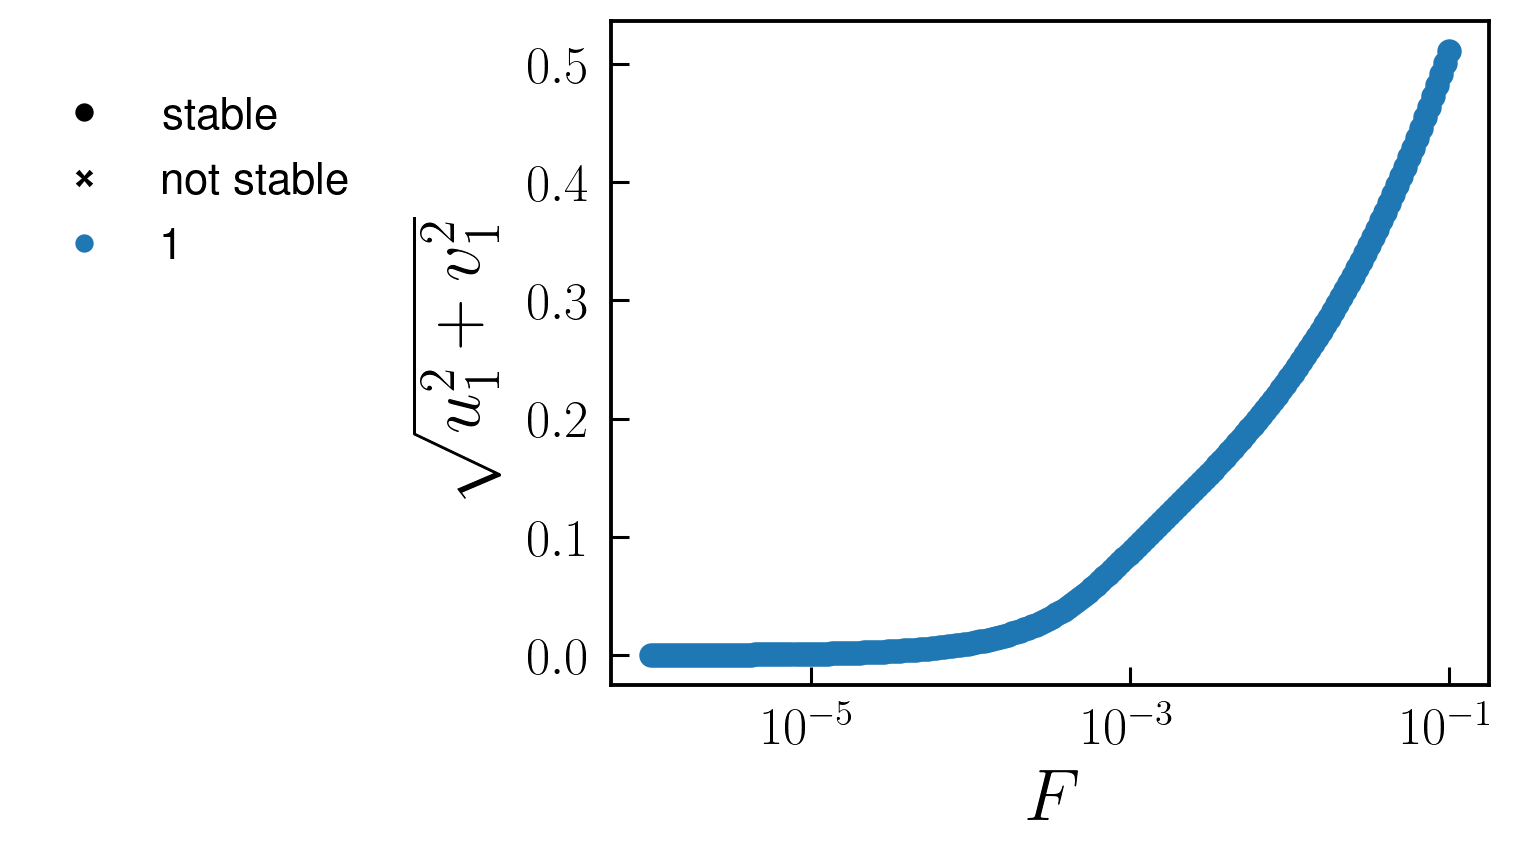

In [5]:
fixed = (α => 1., ω0 => 1.0, γ => 1E-2, ω => 1)   # fixed parameters
swept = F => 10 .^ LinRange(-6, -1, 200)           # range of parameter values
solutions = get_steady_states(harmonic_eq, swept, fixed)

plot(solutions, x="F", y="sqrt(u1^2 + v1^2)");
HarmonicBalance.xscale("log")
HarmonicBalance.savefig("Duffing_nonlin_aF.png")

## linear response to white noise vs drive amplitude (Fig. 2 (a))
a single stable branch was found - let's obtain its linear response via the Jacobian

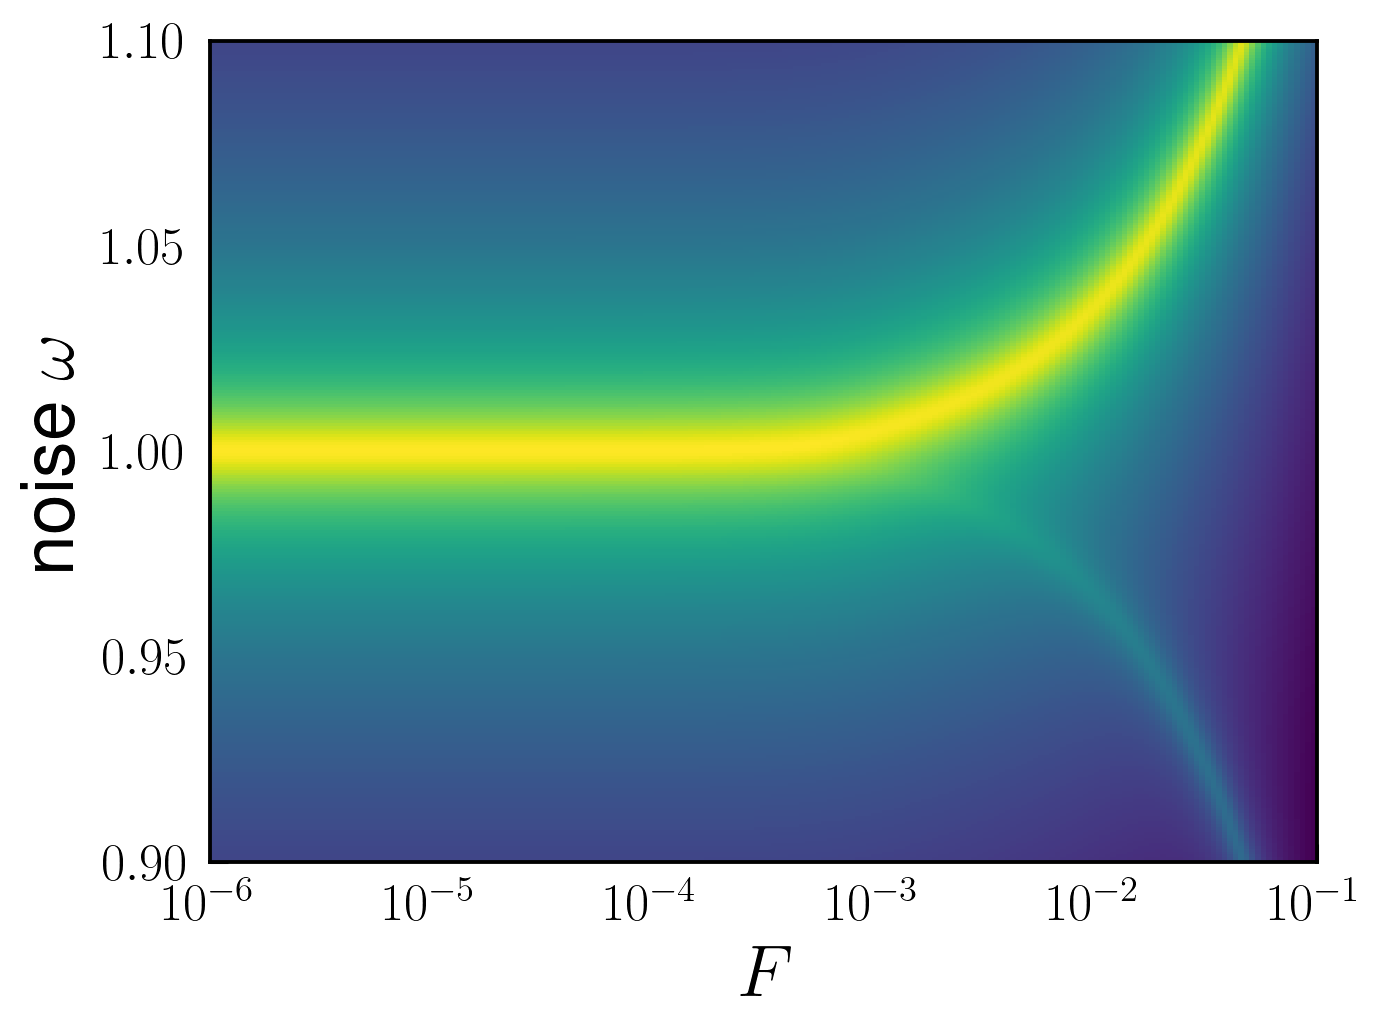

In [68]:
HarmonicBalance.LinearResponse.plot_jacobian_spectrum(solutions, x, 
    Ω_range=LinRange(0.9,1.1,300), branch=1, logscale=true);

HarmonicBalance.xscale("log")
HarmonicBalance.savefig("Duffing_nonlin_aF_noise.png")